<a href="https://colab.research.google.com/github/Rvd001/ML/blob/master/K-Nearest%20Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [ ]:
import pandas as pd

df = pd.read_csv(url, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
columns_names = {
                 0: 'id', 
                 1: 'clump_thickness',
                 2 : 'unif_cell_size',
                 3 : 'unif_cell_shape',
                 4: 'marg_adhesion',
                 5 : 'single_epith_cell_size',
                 6 : 'bare_nuclei', 
                 7 : 'bland_chrom', 
                 8 : 'norm_nucleoli', 
                 9 : 'mitoses', 
                 10 : 'class'}

In [ ]:
df = df.rename(columns = columns_names)
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.tail()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
df.describe()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chrom             699 non-null    int64 
 8   norm_nucleoli           699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
class                     0
dtype: int64

In [ ]:
df.replace("?", -9999, inplace = True) #-9999 makes the model see the nan data as an outlier instead of deleting it
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.columns

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
df.drop(["id"], axis = 1, inplace = True) #dropping id because it cannot have any effect on the classification
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
#Selecting the Feature and the Label and then converting to an array
import numpy as np

x = np.array(df.drop(['class'], axis = 1))
y = np.array(df['class'])


In [ ]:
x

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [ ]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,

In [ ]:
#Dividing Into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#Importing KNN Model

from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) * 100

print(accuracy)

99.28571428571429


In [ ]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
x

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [ ]:
#predicting a random feature set
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,3,1,2,2,3,2,1], [5,2,3,5,2,6,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1)
prediction = clf.predict(example_measures)
prediction

array([2, 2, 4])

## **Euclidean Distance**

In [ ]:
plot1 = [1,3]
plot2 = [2,5]

from math import sqrt
euclidean_distance = sqrt( (plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2 )
euclidean_distance

2.23606797749979

## **Writing KNN from scratch**

In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from math import sqrt
from collections import Counter


In [ ]:
dataset = {'k': [[1,2],[2,3],[3,1]] ,  'r': [[6,5],[7,7],[8,6]] }  #K and R are two different 
#class with their positions specified in a list
new_features = [5,7]

In [ ]:
len(dataset) #K and r makes the length

2

In [ ]:
for i in dataset:
  print(i)

k
r


In [ ]:
for i in dataset:
  for ii in dataset[i]:
    print(ii)

[1, 2]
[2, 3]
[3, 1]
[6, 5]
[7, 7]
[8, 6]


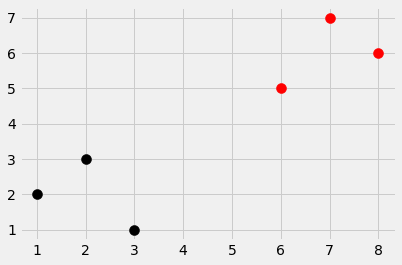

In [ ]:
for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0], ii[1], s = 100, color = i )

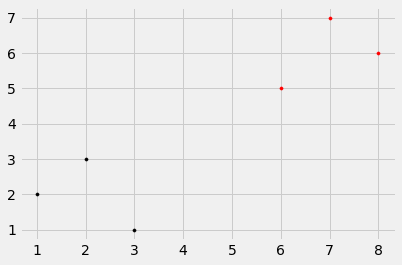

In [ ]:
for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0], ii[1], s = 10, color = i ) #S is size r in color stands as red while k stands as black

[[<matplotlib.collections.PathCollection at 0x7efbde29c780>,

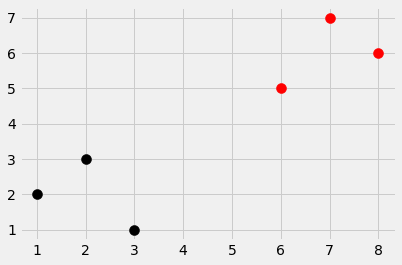

In [ ]:
[[plt.scatter(ii[0], ii[1], s = 100, color = i)  for ii in dataset[i]] for i in dataset] #Another form of forloop

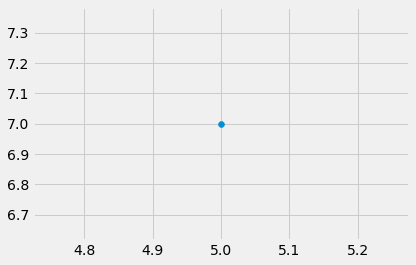

In [ ]:
plt.scatter(new_features[0], new_features[1]) #plotting the value to be classified or predicted

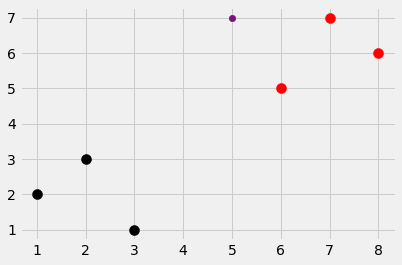

In [ ]:
for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0], ii[1], s = 100, color = i )
    plt.scatter(new_features[0], new_features[1])  #Plotting the value to be predicted alongside the value of the class

[[[[<matplotlib.collections.PathCollection at 0x7efbde161278>],
  [[<matplotlib.collections.PathCollection at 0x7efbde161048>],
  [[<matplotlib.collections.PathCollection at 0x7efbde148d30>],
 [[[<matplotlib.collections.PathCollection at 0x7efbde18ab00>],
  [[<matplotlib.collections.PathCollection at 0x7efbde18a5c0>],
  [[<matplotlib.collections.PathCollection at 0x7efbde18af98>],

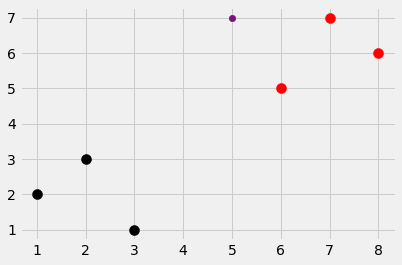

In [ ]:
[[ [[plt.scatter(new_features[0], new_features[1])],  [plt.scatter(ii[0], ii[1], s = 100, color = i)]]
  for ii in dataset[i]] for i in dataset]  #using another for loop method

## **KNN neighbors python code**

In [ ]:
def k_nearest_neighbors(data, predict, k = 3):
  if len(data) >= k:
    warnings.warn('K is set to a value less than the total class!') #this is not good because the classes contains data point
  distance = []
  for individual_class in data:
    for features in data[individual_class]:
      #euclidean_distance = np.sqrt( np.sum( np.array(predict) - np.array(features)**2  ) )
      euclidean_distance = np.linalg.norm( np.array(features) - np.array(predict) )
      #features are the data point in a class
      #predict are the data points to be classified
      distance.append([euclidean_distance, individual_class])
      #this makes a list of a data point and the class it belongs to

  votes = [ i[1] for i in sorted(distance)[:k] ]
  #this sorts the distance list up to the number on nearest points to be found
  #the distance list contains the data point and the class the data point belongs to
  print('the vote is: ',votes)
  print('The vote count is: ',Counter(votes)) #this creates a dictionary with the class and number of data points
  #close to the predicted value that belongs to each class
  print(Counter(votes).most_common(1)) #This creates a tuple in a list with just the highest class and
  #with the data point as classified
  print(Counter(votes).most_common(1)[0] ) #This takes the first list / zero index item in the list, i.e the first tuple
  print("Vote result is: ",Counter(votes).most_common(1)[0][0]) #this takes the first element / zero indexed
  #element in the tuple
  vote_result = Counter(votes).most_common(1)[0][0]
  return vote_result

In [ ]:
dataset = {'k': [[1,2],[2,3],[3,1]] ,  'r': [[6,5],[7,7],[8,6]] }  #K and R are two different 
#class with their positions specified in a list
new_features = [5,7]

In [ ]:
len(dataset)

2

In [ ]:
result = k_nearest_neighbors(dataset, new_features) #default classification data point is 3 as specified in the function defintion
#print(result)

the vote is:  ['r', 'r', 'r']
The vote count is:  Counter({'r': 3})
[('r', 3)]
('r', 3)
Vote result is:  r


In [ ]:
result = k_nearest_neighbors(dataset, new_features, 7) #for this data the highest point in the dataset is 6,
#that's why 6 votes are returned

the vote is:  ['r', 'r', 'r', 'k', 'k', 'k']
The vote count is:  Counter({'r': 3, 'k': 3})
[('r', 3)]
('r', 3)
Vote result is:  r


In [ ]:
result = k_nearest_neighbors(dataset, new_features,20)

the vote is:  ['r', 'r', 'r', 'k', 'k', 'k']
The vote count is:  Counter({'r': 3, 'k': 3})
[('r', 3)]
('r', 3)
Vote result is:  r


In [ ]:
result = k_nearest_neighbors(dataset, new_features,5)

the vote is:  ['r', 'r', 'r', 'k', 'k']
The vote count is:  Counter({'r': 3, 'k': 2})
[('r', 3)]
('r', 3)
Vote result is:  r


In [ ]:
result = k_nearest_neighbors(dataset, new_features,4)

the vote is:  ['r', 'r', 'r', 'k']
The vote count is:  Counter({'r': 3, 'k': 1})
[('r', 3)]
('r', 3)
Vote result is:  r


In [ ]:
result = k_nearest_neighbors(dataset, new_features,1)

the vote is:  ['r']
The vote count is:  Counter({'r': 1})
[('r', 1)]
('r', 1)
Vote result is:  r


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: K is set to a value less than the total class!
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
a = df.values.tolist()
a #notice some values are actually a string, so converting to a float is necessary.

[[5, 1, 1, 1, 2, '1', 3, 1, 1, 2],
 [5, 4, 4, 5, 7, '10', 3, 2, 1, 2],
 [3, 1, 1, 1, 2, '2', 3, 1, 1, 2],
 [6, 8, 8, 1, 3, '4', 3, 7, 1, 2],
 [4, 1, 1, 3, 2, '1', 3, 1, 1, 2],
 [8, 10, 10, 8, 7, '10', 9, 7, 1, 4],
 [1, 1, 1, 1, 2, '10', 3, 1, 1, 2],
 [2, 1, 2, 1, 2, '1', 3, 1, 1, 2],
 [2, 1, 1, 1, 2, '1', 1, 1, 5, 2],
 [4, 2, 1, 1, 2, '1', 2, 1, 1, 2],
 [1, 1, 1, 1, 1, '1', 3, 1, 1, 2],
 [2, 1, 1, 1, 2, '1', 2, 1, 1, 2],
 [5, 3, 3, 3, 2, '3', 4, 4, 1, 4],
 [1, 1, 1, 1, 2, '3', 3, 1, 1, 2],
 [8, 7, 5, 10, 7, '9', 5, 5, 4, 4],
 [7, 4, 6, 4, 6, '1', 4, 3, 1, 4],
 [4, 1, 1, 1, 2, '1', 2, 1, 1, 2],
 [4, 1, 1, 1, 2, '1', 3, 1, 1, 2],
 [10, 7, 7, 6, 4, '10', 4, 1, 2, 4],
 [6, 1, 1, 1, 2, '1', 3, 1, 1, 2],
 [7, 3, 2, 10, 5, '10', 5, 4, 4, 4],
 [10, 5, 5, 3, 6, '7', 7, 10, 1, 4],
 [3, 1, 1, 1, 2, '1', 2, 1, 1, 2],
 [8, 4, 5, 1, 2, -9999, 7, 3, 1, 4],
 [1, 1, 1, 1, 2, '1', 3, 1, 1, 2],
 [5, 2, 3, 4, 2, '7', 3, 6, 1, 4],
 [3, 2, 1, 1, 1, '1', 2, 1, 1, 2],
 [5, 1, 1, 1, 2, '1', 2, 1, 1, 2],
 [2, 1

In [ ]:
b = df.astype(int).values.tolist() #this converts the value from string type to integer type and then converts to a list
b

[[5, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [5, 4, 4, 5, 7, 10, 3, 2, 1, 2],
 [3, 1, 1, 1, 2, 2, 3, 1, 1, 2],
 [6, 8, 8, 1, 3, 4, 3, 7, 1, 2],
 [4, 1, 1, 3, 2, 1, 3, 1, 1, 2],
 [8, 10, 10, 8, 7, 10, 9, 7, 1, 4],
 [1, 1, 1, 1, 2, 10, 3, 1, 1, 2],
 [2, 1, 2, 1, 2, 1, 3, 1, 1, 2],
 [2, 1, 1, 1, 2, 1, 1, 1, 5, 2],
 [4, 2, 1, 1, 2, 1, 2, 1, 1, 2],
 [1, 1, 1, 1, 1, 1, 3, 1, 1, 2],
 [2, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [5, 3, 3, 3, 2, 3, 4, 4, 1, 4],
 [1, 1, 1, 1, 2, 3, 3, 1, 1, 2],
 [8, 7, 5, 10, 7, 9, 5, 5, 4, 4],
 [7, 4, 6, 4, 6, 1, 4, 3, 1, 4],
 [4, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [4, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [10, 7, 7, 6, 4, 10, 4, 1, 2, 4],
 [6, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [7, 3, 2, 10, 5, 10, 5, 4, 4, 4],
 [10, 5, 5, 3, 6, 7, 7, 10, 1, 4],
 [3, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [8, 4, 5, 1, 2, -9999, 7, 3, 1, 4],
 [1, 1, 1, 1, 2, 1, 3, 1, 1, 2],
 [5, 2, 3, 4, 2, 7, 3, 6, 1, 4],
 [3, 2, 1, 1, 1, 1, 2, 1, 1, 2],
 [5, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [2, 1, 1, 1, 2, 1, 2, 1, 1, 2],
 [1, 1, 3, 1, 2, 1, 1, 1, 1

In [ ]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
full_data = df.astype(float).values.tolist() #this converts the string to a float 
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [ ]:
def k_nearest_neighbors(data, predict, k = 3):
  if len(data) >= k:
    warnings.warn('K is set to a value less than the total class!') #this is not good because the classes contains data point
  distance = []
  for individual_class in data:
    for features in data[individual_class]:
      #euclidean_distance = np.sqrt( np.sum( np.array(predict) - np.array(features)**2  ) )
      euclidean_distance = np.linalg.norm( np.array(features) - np.array(predict) )
      #features are the data point in a class
      #predict are the data points to be classified
      distance.append([euclidean_distance, individual_class])
      #this makes a list of a data point and the class it belongs to

  votes = [ i[1] for i in sorted(distance)[:k] ]
  #this sorts the distance list up to the number on nearest points to be found
  #the distance list contains the data point and the class the data point belongs to
  print('the vote is: ',votes)
  print('The vote count is: ',Counter(votes)) #this creates a dictionary with the class and number of data points
  #close to the predicted value that belongs to each class
  print('most common class and number of data point is: ', Counter(votes).most_common(1)) #This creates a tuple in a list with just the highest class and
  #with the data point as classified
  print(Counter(votes).most_common(1)[0] ) #This takes the first list / zero index item in the list, i.e the first tuple
  print("Vote result is: ",Counter(votes).most_common(1)[0][0]) #this takes the first element / zero indexed
  #element in the tuple
  vote_result = Counter(votes).most_common(1)[0][0]
  return vote_result

In [ ]:
import pandas as pd
import random

In [ ]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
full_data = df.astype(float).values.tolist()


In [ ]:
full_data[:5]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [ ]:
random.shuffle(full_data)

In [ ]:
full_data[:5]

[[2.0, 7.0, 10.0, 10.0, 7.0, 10.0, 4.0, 9.0, 4.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 9.0, 7.0, 5.0, 5.0, 8.0, 4.0, 2.0, 1.0, 2.0]]

In [ ]:
len(full_data)

699

In [ ]:
0.2 * 699 #this means 20% of the data contained in the list

139.8

In [ ]:
int(0.2 * 699) #this converts a float to a list

139

In [ ]:
full_data[0:5] #this takes from the 0 index to the 5th index

[[2.0, 7.0, 10.0, 10.0, 7.0, 10.0, 4.0, 9.0, 4.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 9.0, 7.0, 5.0, 5.0, 8.0, 4.0, 2.0, 1.0, 2.0]]

In [ ]:
full_data[0:-5] #this takes from the 0 index to the last index until the last 5 index

[[2.0, 7.0, 10.0, 10.0, 7.0, 10.0, 4.0, 9.0, 4.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 9.0, 7.0, 5.0, 5.0, 8.0, 4.0, 2.0, 1.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0],
 [1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 4.0, 1.0, 4.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 2.0, 1.0, 2.0],
 [10.0, 10.0, 10.0, 3.0, 10.0, 10.0, 9.0, 10.0, 1.0, 4.0],
 [10.0, 8.0, 4.0, 4.0, 4.0, 10.0, 3.0, 10.0, 4.0, 4.0],
 [6.0, 3.0, 3.0, 3.0, 3.0, 2.0, 6.0, 1.0, 1.0, 2.0],
 [8.0, 6.0, 4.0, 10.0, 10.0, 1.0, 3.0, 5.0, 1.0, 4.0],
 [6.0, 5.0, 5.0, 8.0, 4.0, 10.0, 3.0, 4.0, 1.0, 4.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 1.0, 1.0, 2.0, 1.0,

In [ ]:
full_data[-6:] #this takes from the 6th back ward index to the end

[[5.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [6.0, 6.0, 6.0, 5.0, 4.0, 10.0, 7.0, 6.0, 2.0, 4.0],
 [10.0, 9.0, 7.0, 3.0, 4.0, 2.0, 7.0, 7.0, 1.0, 4.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]

In [ ]:
df.groupby(['class']).count() #checking the class that is available

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses
class,,,,,,,,,
2,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241


In [ ]:
test_size = 0.2
train_set = {2:[], 4:[]} #Grouping into class 2 and 4 using a dictionary
test_set = {2:[], 4:[]}
train_data = full_data[:-int(len(full_data) * test_size)]
test_data = full_data[-int(len(full_data) * test_size) : ]

In [ ]:
train_data[:5]

[[2.0, 7.0, 10.0, 10.0, 7.0, 10.0, 4.0, 9.0, 4.0, 4.0],
 [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 9.0, 7.0, 5.0, 5.0, 8.0, 4.0, 2.0, 1.0, 2.0]]

In [ ]:
test_data[:5]

[[5.0, 10.0, 10.0, 3.0, 8.0, 1.0, 5.0, 10.0, 3.0, 4.0],
 [10.0, 9.0, 8.0, 7.0, 6.0, 4.0, 7.0, 10.0, 3.0, 4.0],
 [6.0, 10.0, 2.0, 8.0, 10.0, 2.0, 7.0, 8.0, 10.0, 4.0],
 [9.0, 5.0, 5.0, 2.0, 2.0, 2.0, 5.0, 1.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [ ]:
for i in train_data:
  train_set[i[-1]].append(i[:-1])


for i in test_data:
  test_set[i[-1]].append(i[:-1])  

In [ ]:
train_set

{2: [[3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0],
  [6.0, 9.0, 7.0, 5.0, 5.0, 8.0, 4.0, 2.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0],
  [1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 3.0, 4.0, 1.0, 4.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 4.0, 2.0, 1.0],
  [6.0, 3.0, 3.0, 3.0, 3.0, 2.0, 6.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0],
  [5.0, 3.0, 2.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0,